# PROJETO MÓDULO III - Data Science Aplicada

***

## Estatística com python para análise de dados

## O PROJETO

<img src="https://i.ibb.co/FDCHGbL/Whats-App-Image-2021-01-08-at-18-59-40.jpg" alt="Whats-App-Image-2021-01-08-at-18-59-40" width="800" height="662" data-load="full" style="">

### Importação das libs

In [1]:
import          pandas                 as pd
import          matplotlib.pyplot      as plt
import          seaborn                as sns
import          numpy                  as np

from scipy.stats    import normaltest


import warnings
warnings.filterwarnings('ignore')

### Importação dos Datasets

In [2]:
df = pd.read_csv('PENSE_AMOSTRA2_ALUNOESCOLA.CSV', sep=';')
df.head(3)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,VE01P28A,VE01P68,VE01P69,VE01P70,VE01P71,VE01P72,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1,1,1,1,1,1,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1,1,1,1,1,1,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1,1,1,1,1,1,1,3,1,296


In [3]:
# Seleção das colunas
colunas =['VE01P70', 'REGEOGR', 'V0008', 'VB01003', 'VB07004', 'VB07006', 'VB07007', 'VB07008', 'VB07009',
         'VB07010', 'VB12001', 'VB12002', 'VB12003', 'VB11006', 'VB11007', 'VB11001', 'VB11002', 'VB11003',
         'VB11004A', 'VB11005']

In [4]:
# Selecionando somente as colunas que serão utilizadas para análise
df = df[colunas]

In [5]:
colunas = ['politica_contra_bu', 'regiao_geo', 'tipo_escola', 'idade', 'preocupacao_resp', 'amigos_trataram_bem',
          'amigos_trataram_mal', 'motivo_bul', 'praticou_bu', 'ja_sofreu_bul', 'sentido_sozinho',
          'sem_dormir', 'qt_amigos', 'imagem_corporal', 'sentimento_corpo', 'corpo', 'fazendo_corpo', 'remedio_perder_peso',
          'remedio_perder_peso_sem_medico', 'remedio_ganhar_peso']

In [6]:
# Renomeando as colunas
df.columns = colunas

### ENTENDIMENTO DOS DADOS

Nesta seção, será criada uma variável contendo uma tabela com a quantidade de registros em cada uma das colunas.
Esta forma de visualização tem como objetivo entender quais são os dados, analisando o dataset como um todo, poupando tempo e possibilitando um entendimento geral dos dados.

In [7]:
# Contando e agrupando
table = df.apply(pd.Series.value_counts)

# Alterando o tipo de dado para object e os valores nuloes (nan) para a palavra 'None'
table = table.astype(object).replace(np.nan, 'None')

# Substituindo a palavra 'None' para vazio (a fim de facilitar a visualização)
table = table.replace('None', '')

In [8]:
# Visualizando a tabela com a qt. de dados
table

,politica_contra_bu,regiao_geo,tipo_escola,idade,preocupacao_resp,amigos_trataram_bem,amigos_trataram_mal,motivo_bul,praticou_bu,ja_sofreu_bul,sentido_sozinho,sem_dormir,qt_amigos,imagem_corporal,sentimento_corpo,corpo,fazendo_corpo,remedio_perder_peso,remedio_perder_peso_sem_medico,remedio_ganhar_peso
-1,,,,,,,,9250,,,,,,,,,,,,
1,14732,3188,300,,2493,1345,9147,403,2905,7584,5805,5701,642,7102,4608,952,6169,1262,1108,1321
2,1762,3465,9009,,2476,1470,3541,241,13579,8533,3584,4736,988,6604,6920,3261,4688,15107,15243,15007
3,,3276,3072,,3608,3195,2550,705,,387,4580,4149,2056,1969,1807,8822,2674,,,
4,,3207,4175,,2818,4779,670,1110,,,1601,1374,12803,726,2326,2951,2859,,,
5,,3420,,,5070,5677,545,160,,,920,519,,,714,411,,,,
6,,,,,,,,119,,,,,,,,,,,,
7,,,,,,,,4489,,,,,,,,,,,,
9,62,,,,,,,,,,,,,,,,,,,
11,,,,2072,,,,,,,,,,,,,,,,


## POLÍTICA CONTRA BULLYING

***

Em 2016 entrou em vigor a Lei nº 13.185 que classifica o bullying como intimidação sistemática, quando há violência física ou psicológica em atos de humilhação ou discriminação. A classificação também inclui ataques físicos, insultos, ameaças, comentários e apelidos pejorativos, entre outros. 

Fonte: <a href="http://portal.mec.gov.br/component/tags/tag/34487#:~:text=A%20Lei%20n%C2%BA%2013.185%2C%20em,e%20apelidos%20pejorativos%2C%20entre%20outros.">Ministério da Educação</a>

<img src="https://i.ibb.co/TcQGPp3/Captura-de-Tela-2021-01-07-a-s-22-13-32.png" alt="Captura-de-Tela-2021-01-07-a-s-22-13-32" width="540" height="281">


Como analisado abaixo, a maior parte dos alunos responderam afirmativamente a pergunta:

**A escola tem alguma política, norma ou regra escrita que proíba bullying nas suas dependências?**

In [9]:
# Criando e agrupando
q = df['politica_contra_bu'].value_counts()
p = df['politica_contra_bu'].value_counts(normalize = True) * 100

# Criando um DataFrame
t = pd.DataFrame({'Qt' : q, 'Perc' : p})
t 

,Qt,Perc
1,14732,88.982846
2,1762,10.642667
9,62,0.374487


In [10]:
# Selecionando os alunos que responderam 'nao' para política contra bullying e
# calculando a qt. e o percentual por idade

q = df[df['politica_contra_bu'] == 2]['idade'].value_counts()
p = df[df['politica_contra_bu'] == 2]['idade'].value_counts(normalize = True) * 100

#Criando dataframe
t = pd.DataFrame({'Qt' : q, 'Perc' : p}).sort_values(by='Perc', ascending=False)
t 

,Qt,Perc
12,262,14.869467
15,252,14.301930
14,250,14.188422
13,237,13.450624
11,216,12.258797
16,211,11.975028
17,178,10.102157
18,92,5.221339
19,64,3.632236


In [11]:
# Selecionando os alunos que responderam 'sim' para política contra bullying e
# calculando a qt. e o percentual por idade

q = df[df['politica_contra_bu'] == 1]['idade'].value_counts()
p = df[df['politica_contra_bu'] == 1]['idade'].value_counts(normalize = True) * 100

# Criando dataframe
t = pd.DataFrame({'Qt' : q, 'Perc' : p}).sort_values(by='Perc', ascending=False)
t 

,Qt,Perc
12,2372,16.101005
13,2324,15.775183
15,2171,14.736628
16,2041,13.854195
14,1883,12.781700
11,1856,12.598425
17,1322,8.973663
18,466,3.163182
19,297,2.016020


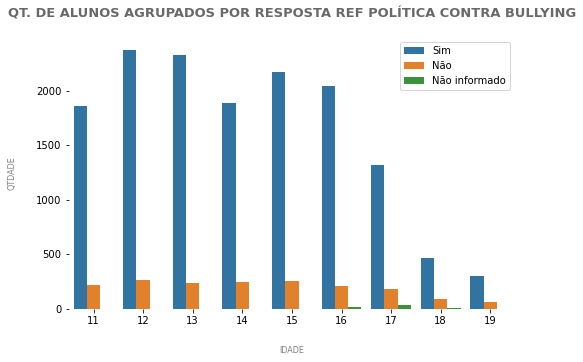

In [12]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(data=df, x='idade' ,hue='politica_contra_bu')

plt.title('QT. DE ALUNOS AGRUPADOS POR RESPOSTA REF POLÍTICA CONTRA BULLYING',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax = sns.despine(bottom = True, left=True)
ax = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
ax = plt.ylabel('QTDADE', color = 'grey', labelpad = 20, fontsize = 8)
ax = plt.legend(labels=['Sim', 'Não', 'Não informado'])

Quase 90% dos alunos responderam que existem políticas, regras ou normas que proíbem bullying nas dependências da escola.

A maior quantidade de alunos que não responderam a pergunta se concentra nas maiores idades

Alunos que reponderam "sim" se concentram nos 12, 13, 15 anos, seguido por 16 e 11 anos.

Vale lembrar que se trata de **quantidades**, ou seja, na amostra, pode haver maior quantidade de alunos em determinadas idades, o que, logicamente, altera a visualização do gráfico.

***

***

## MÉDIA, MEDIANA E DESVIO PADRÃO

**MÉDIA**: A média é provavelmente a estatística mais conhecida e utilizada. De forma bastante resumida, concentra a posição média dos valores. É mais indicada quando os números estão distribuidos de maneira mais uniforme, uma vez que são bastante suscetíveis à outliers.

**MEDIANA**: A mediana é o valor que se concentra exatamente no meio do conjunto de dados.

1 . Para realizar o cálculo, caso o conjunto de dados seja ímpar, basta pegar o número que se encontra exatamente no meio.

2 . Caso o conjunto de dados possuir um número par, basta calcular a média dos dois números que estiverem exatamente no meio, conforme exemplo a seguir:

<img class="alignnone wp-image-13633" src="https://blog.professorferretto.com.br/wp-content/uploads/2017/05/calculo-de-mediana-com-sequencia-par.png" alt="Exemplo de cálculo da mediana com sequência de elementos par" width="601" height="293">

Fonte: <a href="https://blog.professorferretto.com.br/moda-media-e-mediana-medidas-de-tendencia-central/."> BLOG DO FERRETTO </a>



**DESVIO PADRÃO** O desvio padrão é bastante utilizado para identificar a variabilidade. Aproximadamente, o desvio padrão será a distância média do centro, que neste caso, centro seria a média.

O desvio padrão da população toda é representado pela letra grega σ. Já o desvio padrão da amostra é representado pela letra S.

<img class="XqHOTb IGEbUc" alt="\sigma={\sqrt {\frac {\sum(x_{i}-{\mu})^{2}}{N}}}" src="https://www.gstatic.com/education/formulas2/-1/en/population_standard_deviation.svg" role="img" data-atf="0">

### MOTIVO DO BULLYING

Para exemplificar o conceito de média e mediana, serão analisados os motivos de bullying respondidos pelos alunos

VB07008	NOS ÚLTIMOS 30 DIAS, qual o motivo/causa de seus colegas terem te esculachado, zombado, zoado, caçoado, mangado, intimidado ou humilhado?

-1	Pulo no questionário
1	A minha cor ou raça
2	A minha religião
3	A aparência do meu rosto
4	A aparência do meu corpo
5	A minha orientação sexual
6	A minha região de origem
7	Outros motivos/causas
99	Não informado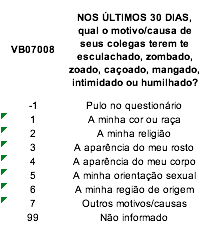

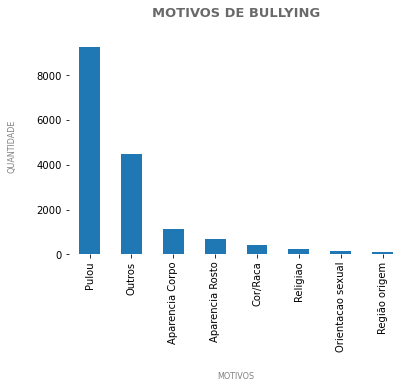

In [13]:
# Copiando o dataframe original (evitar erros)
a = df.copy()

# Criando dicionario com as respostas
rotulos = {-1 : 'Pulou', 1:'Cor/Raca', 2:'Religiao', 3: 'Aparencia Rosto', 4: 'Aparencia Corpo',
          5: 'Orientacao sexual', 6: 'Região origem', 7: 'Outros', 8: 'Não informado'}

# Traduzinho o dicionario
a['motivo_bul'] = a['motivo_bul'].map(rotulos)

# Plotando e configuando o gráfico
ax = (a['motivo_bul'].value_counts()).plot(kind='bar')

ax = plt.title('MOTIVOS DE BULLYING',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax = sns.despine(bottom = True, left=True)
ax = plt.xlabel('MOTIVOS', color = 'grey', labelpad = 20, fontsize = 8)
ax = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)


A grande maioria dos alunos pulam o motivo de bullying.

A aparencia do corpo e do rosto são os dois principais motivos de bullying que foram possíveis identificar.
 

####  BULLYING POR APARÊNCIA - MÉDIA DE IDADE

In [14]:
# Criando uma variável para filtrar os dados que possuem a palavra 'aparencia' na coluna 'motiv_bul'
b = a['motivo_bul'].str.contains('Aparencia')

# Criando uma coluna na variável 'a' conforme variável 'b'
a['aparencia'] = b

In [15]:
# Média de idade das crianças que sofrem bullying por conta da aparência
media = a[a['aparencia'] == True]['idade'].mean()
media 

13.832506887052341

In [16]:
# Mediana de idade das crianças que sofrem bullying por conta da aparência
mediana = a[a['aparencia'] == True]['idade'].median()
mediana

14.0

In [17]:
a[a['aparencia'] == True]['idade'].std()

1.9863206518330716

## HISTOGRAMA

O histograma é uma forma de visualização bastante útil para entender como os dados estão distribuídos, ou seja, representa a frequência do conjunto de dados em classes.

A base de cada retângulo representa uma classe. A altura de cada retângulo representa a quantidade ou a frequência absoluta com que o valor da classe ocorre no conjunto de dados para classes uniformes ou a densidade de frequência para classes não uniformes. (Wikipédia)

O conjunto de dados pode ter diversos comportamentos, dependendo da sua distribuição e frequência:

1 . Caso os dados apresentem valores muito discrepante na parte superior do conjunto de dados, o histograma ficará distorcido para a direita. A média será maior do que a mediana.

2 . Caso os dados apresentem valores muito discrepantes na parte inferior do conjunto de dados, o histograma ficará distorcido para esquerda. A média será menor do que a mediana.

3 . Caso os dados sejam simétricos, representando uma normalidade, a média e a mediana terão aproximadamente o mesmo valor.

<img border="0" data-original-height="386" data-original-width="549" src="https://3.bp.blogspot.com/-ieYxAgEBaxU/WvSQXoLhpqI/AAAAAAAAEeM/3lSn5M_VXYgoWUz6YOGguurvX7DcORkwACEwYBhgL/s1600/assime2.JPG">

Fonte: <a href="http://soniavieira.blogspot.com/2018/05/por-conta-de-umapergunta-sobre-questao_83.html."> Sonia Vieira </a>

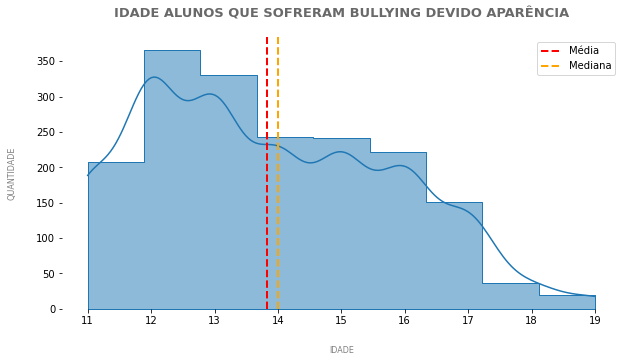

In [18]:
plt.figure(figsize=(10,5))

ax = sns.histplot(a[a['aparencia'] == True]['idade'], bins = 9, kde = True, element="step")

ax = plt.title('IDADE ALUNOS QUE SOFRERAM BULLYING DEVIDO APARÊNCIA',
               pad = 20,
         fontsize = 13, color ='dimgrey', fontweight = 'bold')

ax = sns.despine(bottom = True, left=True)
ax = plt.xlabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)
ax = plt.ylabel('QUANTIDADE', color = 'grey', labelpad = 20, fontsize = 8)

plt.axvline(x=media, linewidth=2, color='red', linestyle='--', label ='Média')
plt.axvline(x=mediana, linewidth=2, color='orange', linestyle='--', label ='Mediana')

plt.legend()
ax;

## BOX PLOT

O Box Plot é um método de visualização de estatística descritiva.
Com ele, é possível visualizar a mediana, quartis e outliers.

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes. A posição central é dada pela mediana e a dispersão por dq. As posições relativas de q1, q2, q3 dão uma noção da assimetria da distribuição. Os comprimentos das caudas são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.
(Bussab e Morettin, Estatística básica, Ed. Saraiva, 2010)

<img alt="Box Plot | Simply Psychology" src="https://www.simplypsychology.org/boxplot.jpg" data-noaft="1" jsname="HiaYvf" jsaction="load:XAeZkd;" style="width: 435px; height: 223.158px; ">

### SENTIMENTO EM RELAÇÃO AO CORPO

VB11007	Como você se sente em relação ao seu corpo?

1	Muito satisfeito(a)
2	Satisfeito(a)
3	Indiferente
4	Insatisfeito(a)
5	Muito insatisfeito(a)
99	Não informado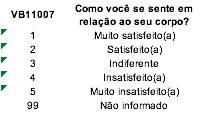

In [19]:
# Selecionando somente os alunos que sofreram bullying pela aparência do corpo
a = df[df['motivo_bul'] == 4]

# Dicionário com as respostas
l = {1:'1 Muito satisfeito', 2:'2 Satisfeito', 3:'3 Indiferente', 4:'4 Insatisfeito', 
      5:'5 Muito insatisfeito', 99:'6 Não Informado'}

# Traduzinho o dicionario
a['sentimento_corpo'] = a['sentimento_corpo'].map(l)

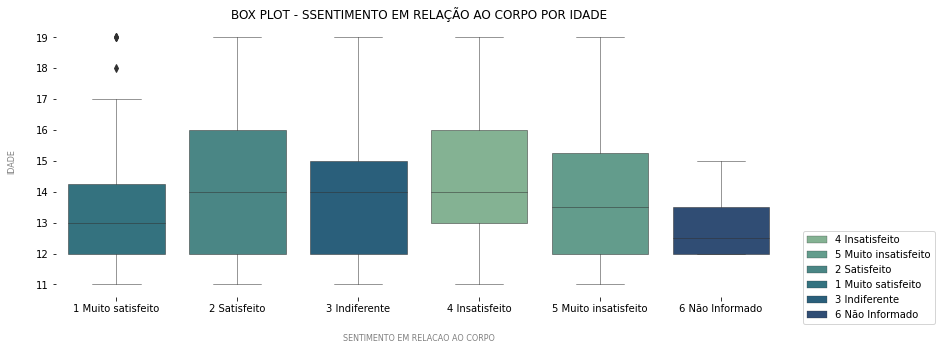

In [20]:
# Plot
plt.figure(figsize=(13, 5))
ax = sns.boxplot(data = a, x ='sentimento_corpo', y='idade', hue='sentimento_corpo', 
                 palette = 'crest', linewidth = 0.5, dodge=False, order=l.values())

sns.despine(bottom = True, left=True)

plt.title('BOX PLOT - SSENTIMENTO EM RELAÇÃO AO CORPO POR IDADE')
plt.xlabel('SENTIMENTO EM RELACAO AO CORPO', color = 'grey', labelpad = 20, fontsize = 8)
plt.ylabel('IDADE', color = 'grey', labelpad = 20, fontsize = 8)

# "Movendo" a legenda
plt.legend(loc=(1.03, -0.1), borderaxespad=0)

ax;

## CORRELAÇÃO E CAUSALIDADE

Confundindo com frequência, correlação e causalidade são dois termos diferentes.

**Correlação:** Observa-se se duas variáveis numéricas possuem alguma tipo de relação, ou seja, uma possível existência de ligação. Quando a variável X aumenta, a Y também aumenta (e vice-versa). Exemplo: Aumento de temperatura x consumo de sorvete - Quanto maior a temperatura, maior o consumo de cerveja.


***

**Interpretando os gráficos de dispersão**
- Se os dados formarem uma linha ascendente, conforme você se movimenta da esquerda para a direita, isso indica a existência de uma relação linear (ou proporcional) positiva. Conforme x aumenta (movendo-se uma unidade para a direita), y aumenta (movendo-se para cima) um determinado valor.


- Se os dados formarem uma linha descendente conforme você se movimenta da esquerda para a direita, isso indica a existência de uma relação relação linear (ou proporcional) negativa. Significa que conforme x aumenta (movimentando-se uma unidade para a direita), y diminui (movimentando-se para baixo) uma determinada quantia.

- Se os dados não se parecerem com nenhum tipo de linha (nem mesmo vagamente), isso indica que não existe nenhum tipo de relação linear entre as variáveis.

Rumsey, Deborah. Estatística Para Leigos (p. 469). Alta Books. Edição do Kindle. 

***

O exemplo bastante claro e até "engraçado" é a relação entre a temperatura do ambiente e a quantidade de cricrilar dos grilos. A proposta é que você deve contar a quantidade de vezes que um grilo cricila por 15 seg, somar 40 e saberá a temperatura do ambiente. (Lembre-se de converter para graus Celsius)
<br>
<br>
<img loading="lazy" data-attachment-id="23157" data-permalink="https://wohaliterapias.wordpress.com/grilo-verde/" data-orig-file="https://wohaliterapias.files.wordpress.com/2020/01/grilo-verde.jpg" data-orig-size="400,300" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="grilo-verde" data-image-description="" data-medium-file="https://wohaliterapias.files.wordpress.com/2020/01/grilo-verde.jpg?w=300" data-large-file="https://wohaliterapias.files.wordpress.com/2020/01/grilo-verde.jpg?w=400" src="https://wohaliterapias.files.wordpress.com/2020/01/grilo-verde.jpg?w=400" alt="" class="wp-image-23157" width="400" height="300" srcset="https://wohaliterapias.files.wordpress.com/2020/01/grilo-verde.jpg 400w, https://wohaliterapias.files.wordpress.com/2020/01/grilo-verde.jpg?w=150 100w, https://wohaliterapias.files.wordpress.com/2020/01/grilo-verde.jpg?w=300 200w" sizes="(max-width: 600px) 100vw, 600px">

Neste exemplo, parece existir uma relação linear positiva entre o número de vezes que um grilo crica e a temperatura externa. Ou seja, quanto mais o grilo cricrilar, maior é a temperatura. Rumsey, Deborah. Estatística Para Leigos (p. 469). Alta Books. Edição do Kindle. 

Você pode saber clicando aqui: <a href="https://www.tecmundo.com.br/ciencia/18444-voce-pode-medir-a-temperatura-de-um-ambiente-ouvindo-os-grilos-la-fora.htm"> Você pode medir a temperatura de um ambiente ouvindo os grilos lá fora </a>


***

**Causalidade:** Diferentemente da correlação, causalidade se trata da relação entre um evento A e um evento B, ou seja, quando ocorrer o A, o evento B será impactado.

Para entender a diferença entre correlação e causalidade de forma clara, tomando como exemplo a grilo e a temperatura. Trata-se de uma correlação, como foi falado. Não pode ser considerado uma causalidade, uma vez que não é porquê o grilo crica que a temperatura se eleva. A variação de temperatura tem outras origens que não estão relacionadas aos grilos.

### ANALISANDO A CORRELAÇÃO

Dando continuidade na análise e observar a correlação entre as variáveis, primeiramente, serão selecionadas as variáveis alvo.

O objetivo é entender o comportamento dos alunos que sofrem bullying devido a aparência do corpo (primeiro motivo identificado na pesquisa - 1 pulou e 2 classificado como 'outros'), assim, serão consideradas as colunas:

- amigos_trataram_bem e amigos_trataram_mal

- sentido_sozinho

- sem_dormir

- qt_amigos

- imagem_corporal

- sentimento_corpo

- fazendo_corpo

- remedio_perder_peso

- remedio_perder_peso_sem_medico

- remedio_ganhar_peso

In [21]:
# colunas selecionadas
c = ['motivo_bul','amigos_trataram_bem', 'amigos_trataram_mal', 'sentido_sozinho','sem_dormir', 'qt_amigos', 
     'imagem_corporal', 'sentimento_corpo', 'corpo', 'fazendo_corpo', 'remedio_perder_peso', 
     'remedio_perder_peso_sem_medico', 'remedio_ganhar_peso']

# 'Filtrando' o dataframe com as colunas selecionadas
c = df[c]

# Selecionando somente os alunos que sofreram bullyng devido a aparência do corpo
c = c[c['motivo_bul'] == 4]

In [22]:
# Visualizando se as respostas são ordinais (é possível classificá-las? ex: meses do ano) 
tabela = c.copy()

# Contando e agrupando
tabela = tabela.apply(pd.Series.value_counts)

# Alterando o tipo de dado para object e os valores nuloes (nan) para a palavra 'None'
tabela = tabela.astype(object).replace(np.nan, 'None')

# Substituindo a palavra 'None' para vazio (a fim de facilitar a visualização)
tabela = tabela.replace('None', '')

tabela

,motivo_bul,amigos_trataram_bem,amigos_trataram_mal,sentido_sozinho,sem_dormir,qt_amigos,imagem_corporal,sentimento_corpo,corpo,fazendo_corpo,remedio_perder_peso,remedio_perder_peso_sem_medico,remedio_ganhar_peso
1,,80,,267,276,49,401,140,120,278,128,105,90
2,,173,459,214,304,91,468,283,173,551,979,998,1013
3,,317,405,342,330,184,162,194,239,214,,,
4,1110,317,135,182,146,786,77,329,449,63,,,
5,,221,111,105,54,,,160,128,,,,
99,,2,,,,,2,4,1,4,3,7,7


**ATENÇÃO**

Conforme dicionário de dados, foram analisadas as respostas para identificar quais poderiam ser consideradas ordinais.

Exemplo:

VB07007	Nos últimos 30 dias, com que frequência algum dos seus colegas de escola te esculacharam, zoaram, mangaram, intimidaram ou caçoaram tanto que você ficou magoado, incomodado, aborrecido, ofendido ou humilhado?
1	Nunca
2	Raramente
3	Às vezes
4	Na maior parte do tempo
5	Sempre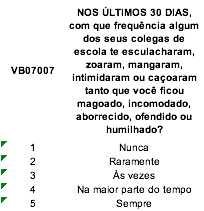

Entende-se que quanto maior for o número de resposta, pior. Ou seja, considerando que a pergunta se refere a quantas vezes o aluno foi esculachado/zoado/humilhado, etc., a resposta 1 (que seria nunca) é melhor do que a 5 (que é sempre).

Assim, analisando todas as outras variáveis, foram selecionadas novamente as variáveis onde as respostas podem ser classificadas da mesma forma.

In [23]:
# Selecionando as variáveis
var = c[['amigos_trataram_mal', 'sentido_sozinho', 'sem_dormir', 'sentimento_corpo']] 

# Verificando que existem respostas com 99, o que pode distorcer os resultados. Estas resposta (apenas 4) serão
# excluidas do dataframe
# Selecionando os índices que possuem resposta 99
r = var[var['sentimento_corpo'] == 99].index

# Excluindo os indices (variável r)
var.drop(r, axis=0, inplace = True)

# Verificando se está correto
var['sentimento_corpo'].value_counts()

4    329
2    283
3    194
5    160
1    140
Name: sentimento_corpo, dtype: int64

### COEFICIENTE DE CORRELAÇÃO

O coeficiente de correlação mede a força e a direção entre duas variáveis. 

A força desta relação vai variar conforme a similariedade dos dados em uma linha reta, podendo ser positiva ou negativa.

**Interpretando a correlação**

- A correlação r sempre é um valor entre -1 e +1.  
- A correlação exatamente igual a -1 indica a existência de uma relação linear negativa perfeita.  
- A correlação próxima a -1 indica a existência de uma relação linear negativa forte.  
- A correlação próxima a 0 significa a não existência de relações lineares.  
- A correlação próxima de +1 indica a existência de uma relação linear positiva forte.
- A correlação exatamente igual a +1 indica a existência de uma relação linear positiva perfeita.
- A ordem dos valores de x e y podem se alterar dentro do conjunto de dados e a correlação ainda permanecerá a mesma.

Rumsey, Deborah. Estatística Para Leigos (p. 475 - 477). Alta Books. Edição do Kindle. 

**Níveis de correlação**

<img loading="lazy" data-attachment-id="325" data-permalink="https://segredosdaestatistica.wordpress.com/semanas/semana-5-correlacoes/correlacao-2/" data-orig-file="https://segredosdaestatistica.files.wordpress.com/2016/04/correlac3a7c3a3o.jpg" data-orig-size="640,418" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;,&quot;orientation&quot;:&quot;0&quot;}" data-image-title="correlação" data-image-description="" data-medium-file="https://segredosdaestatistica.files.wordpress.com/2016/04/correlac3a7c3a3o.jpg?w=300" data-large-file="https://segredosdaestatistica.files.wordpress.com/2016/04/correlac3a7c3a3o.jpg?w=593" class="alignnone size-full wp-image-325" src="https://segredosdaestatistica.files.wordpress.com/2016/04/correlac3a7c3a3o.jpg?w=593&amp;h=387" alt="correlação" width="593" height="387" srcset="https://segredosdaestatistica.files.wordpress.com/2016/04/correlac3a7c3a3o.jpg?w=593&amp;h=387 593w, https://segredosdaestatistica.files.wordpress.com/2016/04/correlac3a7c3a3o.jpg?w=150&amp;h=98 150w, https://segredosdaestatistica.files.wordpress.com/2016/04/correlac3a7c3a3o.jpg?w=300&amp;h=196 300w, https://segredosdaestatistica.files.wordpress.com/2016/04/correlac3a7c3a3o.jpg 640w" sizes="(max-width: 593px) 100vw, 593px">

Fonte: <a href="https://segredosdaestatistica.wordpress.com/semanas/semana-5-correlacoes/"> Segredos da Estatística </a>
***

**Exemplos de ângulo de inclinação conforme coeficiente de relação** 

<img alt="Fichier:Correlation examples2.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/506px-Correlation_examples2.svg.png" decoding="async" width="506" height="231" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/759px-Correlation_examples2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1012px-Correlation_examples2.svg.png 2x" data-file-width="506" data-file-height="231">

Fonte: <a href="https://fr.wikipedia.org/wiki/Fichier:Correlation_examples2.svg"> Wikipédia </a>


<AxesSubplot:>

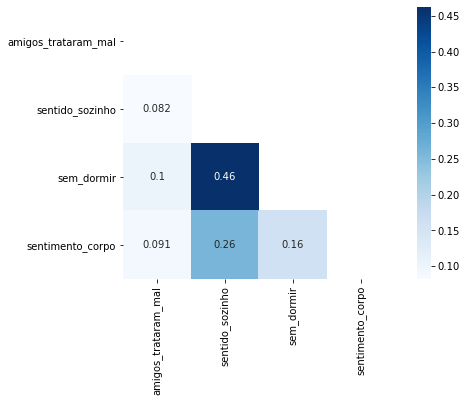

In [24]:
# Plotando a matiz de correlação
correlacao = var.corr()

mask = np.triu(np.ones_like(correlacao, dtype=bool))

plt.figure(figsize=(8,5))
sns.heatmap(correlacao, annot=True, square = True, mask = mask, cmap = 'Blues')

Text(0, 0.5, 'DIFICULDADES PARA DORMIR')

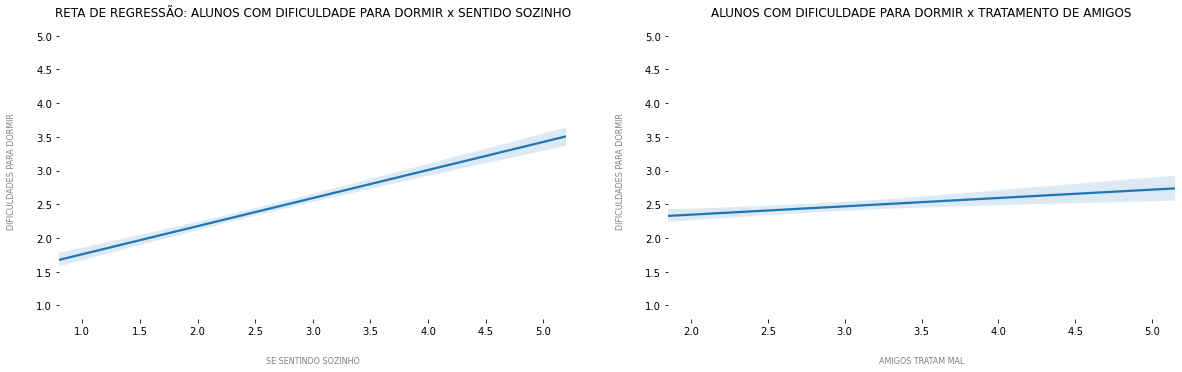

In [25]:
plt.figure(figsize=(20, 12))

ax = plt.subplot(2, 2, 1)
ax = sns.regplot(data =var, x='sentido_sozinho', y='sem_dormir', truncate=False, marker='')

sns.despine(bottom = True, left=True)

plt.title('RETA DE REGRESSÃO: ALUNOS COM DIFICULDADE PARA DORMIR x SENTIDO SOZINHO')
plt.xlabel('SE SENTINDO SOZINHO', color = 'grey', labelpad = 20, fontsize = 8)
plt.ylabel('DIFICULDADES PARA DORMIR', color = 'grey', labelpad = 20, fontsize = 8)

####

ax2 = plt.subplot(2,2,2)
ax2 = sns.regplot(data =var, x='amigos_trataram_mal', y='sem_dormir', truncate=False, marker='')

sns.despine(bottom = True, left=True)

plt.title('ALUNOS COM DIFICULDADE PARA DORMIR x TRATAMENTO DE AMIGOS')
plt.xlabel('AMIGOS TRATAM MAL', color = 'grey', labelpad = 20, fontsize = 8)
plt.ylabel('DIFICULDADES PARA DORMIR', color = 'grey', labelpad = 20, fontsize = 8)


Quando comparadas as variáveis: Alunos que se sentem sozinhos x Dificuldades para dormir e Amigos que tratam mal x dificuldades para dormir, com coeficientes de correlação 0,46 e 0,10, observa-se a inclinação positiva muito muito maior na primeira reta.

Conforme a matriz de correlação acima, a relação mais forte está na primeira relação em: Se_sentindo_sozinho x Dificuldades_para_dormir, ou seja, observando a reta, os alunos que declararam que se sentem sozinhos, tendem a ter mais dificuldades para dormir.

### COMPARANDO OS NÚMEROS

Nesta seção, vamos analisar se escolas com políticas contra Bullying refletem no bem estar dos alunos

VB07009	NOS ÚLTIMOS 30 DIAS, você esculachou, zombou, mangou, intimidou ou caçoou algum de seus colegas da escola tanto que ele ficou magoado, aborrecido, ofendido ou humilhado?
1	Sim
2	Não
99	Não informado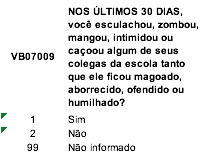

VB07010	Você já sofreu bullying?
1	Sim
2	Não
3	Não sei o que é bullying
99	Não informado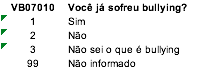

In [27]:
# Variáveis 'separando' se na escola há política contra bullying
politica_sim = df[df['politica_contra_bu'] == 1]
politica_nao = df[df['politica_contra_bu'] == 2]

# Calculando o percentual
a = politica_sim['ja_sofreu_bul'].value_counts(normalize =True) * 100
b = politica_nao['ja_sofreu_bul'].value_counts(normalize = True) * 100

# Renomeando Index
indice = {
    1 : 'Sim',
    2 : 'Nao',
    3: 'Nao Sei o que é Bullying',
    99 : 'Nao informado'}

# Renomeando indice
politica = pd.DataFrame({'Politica_Sim' : a, 'Politica_Nao' : b}).sort_index().rename(index=indice)


politica

,Politica_Sim,Politica_Nao
Sim,46.178387,41.770715
Nao,51.377953,53.745743
Nao Sei o que é Bullying,2.131415,4.143019
Nao informado,0.312245,0.340522


A quantidade de alunos que sofreram bullying não diferete muito entre as escolas com e sem políticas contra bullying.

Em escolas que não possuem políticas de ações para lidar com o Bullying, observa-se que, percentualmente, a quantidade de alunos que declararam não conhecer o termo "Bullying" é o dobro.

In [37]:
# Variáveis 'separando' se na escola há política contra bullying
politica_sim = df[df['politica_contra_bu'] == 1]
politica_nao = df[df['politica_contra_bu'] == 2]

# Calculando o percentual
a = politica_sim['praticou_bu'].value_counts(normalize =True) * 100
b = politica_nao['praticou_bu'].value_counts(normalize = True) * 100

# Renomeando Index
indice = {
    1 : 'Sim',
    2 : 'Nao',
    3: 'Nao Sei o que é Bullying',
    99 : 'Nao informado'}

# Renomeando indice
praticou = pd.DataFrame({'Com Politica' : a, 'Sem Politica' : b}).sort_index().rename(index=indice)


praticou

,Com Politica,Sem Politica
Sim,17.607928,16.855846
Nao,81.984795,82.463110
Nao informado,0.407277,0.681044


Observa-se que mais de 80% dos alunos declaram que não esculachou/zombou/mangou/intimidou ou caçoou de colegas de forma que estes se sentissem magoados, entretanto, nota-se divergência nos percentuais quando comparamos a quantidade de alunos que declararam que sofreram Bullying.